# Matthew Viafora - CS559 Assignment 2 - Problem 2

## Import and Read Data

In [1]:
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import linalg
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import linalg
import scipy as sp
import sklearn

### Load data

In [2]:
loaded_images = list()
for pic in listdir('face_data'):
    data = image.imread('face_data/' + pic)
    loaded_images.append(data)
    print('> loaded %s %s' % (pic, data.shape))

> loaded face080.bmp (256, 256)
> loaded face094.bmp (256, 256)
> loaded face043.bmp (256, 256)
> loaded face057.bmp (256, 256)
> loaded face137.bmp (256, 256)
> loaded face123.bmp (256, 256)
> loaded face122.bmp (256, 256)
> loaded face136.bmp (256, 256)
> loaded face056.bmp (256, 256)
> loaded face042.bmp (256, 256)
> loaded face095.bmp (256, 256)
> loaded face081.bmp (256, 256)
> loaded face097.bmp (256, 256)
> loaded face083.bmp (256, 256)
> loaded face068.bmp (256, 256)
> loaded face054.bmp (256, 256)
> loaded face040.bmp (256, 256)
> loaded face108.bmp (256, 256)
> loaded face120.bmp (256, 256)
> loaded face134.bmp (256, 256)
> loaded face135.bmp (256, 256)
> loaded face121.bmp (256, 256)
> loaded face109.bmp (256, 256)
> loaded face041.bmp (256, 256)
> loaded face055.bmp (256, 256)
> loaded face069.bmp (256, 256)
> loaded face082.bmp (256, 256)
> loaded face096.bmp (256, 256)
> loaded face092.bmp (256, 256)
> loaded face086.bmp (256, 256)
> loaded face051.bmp (256, 256)
> loaded

## Split into train/test datasets

In [3]:
x_train,x_test=train_test_split(loaded_images,test_size=0.2)

## Flatten images and create data matrix containing all flattened images

In [4]:
n_train = len(x_train)
d = x_train[0][0].shape[0]*x_train[0][1].shape[0]

In [5]:
x_train_ = np.reshape(x_train, (n_train,d))

### Shape of x_train is now 141 (n training examples) by 65536 (d where d is h*w)

In [6]:
x_train_.shape

(141, 65536)

## Compute mean image and construct X data matrix which is xn - xMEAN

In [7]:
print(x_train_.shape)

(141, 65536)


In [8]:
x_train_1 = x_train_.copy()
x_train_1 = x_train_1.astype('float')
x_train_1 -= np.mean(x_train_1, axis = 0)
print(x_train_1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Mean Image example vs regular image:

#### Mean:

(65536,)
float64
(256, 256)


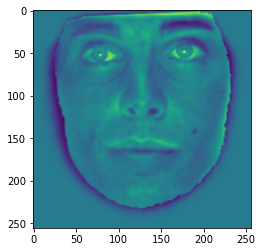

In [9]:
test_image = x_train_1[0]
print(x_train_[0].shape)
ex = (np.reshape(test_image, (256, 256)))
print(ex.dtype)
print(ex.shape)
pyplot.imshow(ex)
pyplot.show()

#### Regular:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
uint8
(256, 256)


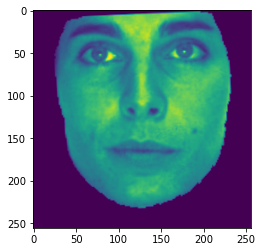

In [10]:
test_image_ = x_train[0]
print(x_train[0])
print(test_image_.dtype)
print(test_image_.shape)
pyplot.imshow(test_image_)
pyplot.show()

## Compute Covariance Matrix/SVD

In [11]:
x_cov = np.cov(x_train_)

#### return eigenvalues in descending order

In [12]:
eig_vals, eig_vects = sp.linalg.eig(x_cov)

In [14]:
eig_vects.shape

(141, 141)

In [15]:
topKVects = eig_vects[:30]

In [16]:
eigenfaces = np.dot(topKVects,x_train_)

In [17]:
eigenfaces = eigenfaces.T
eigenfaces.shape

(65536, 30)

#### Normalize eigenfaces

In [18]:
eigenfaces = sklearn.preprocessing.normalize(eigenfaces,norm="l1")

In [19]:
eigenfaces.shape

(65536, 30)

# FIGURE 1: Visualize top 10 Eigenfaces

EIGENFACE:  1


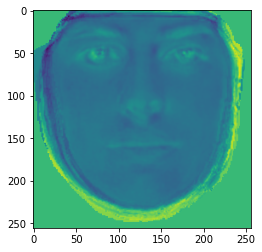

EIGENFACE:  2


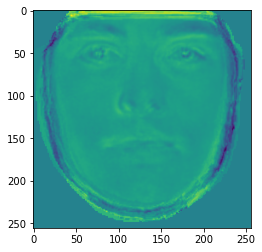

EIGENFACE:  3


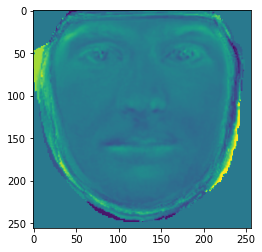

EIGENFACE:  4


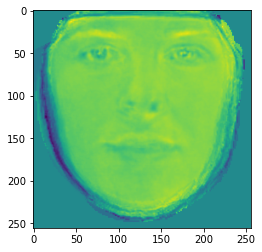

EIGENFACE:  5


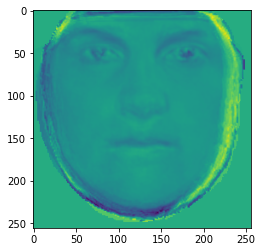

EIGENFACE:  6


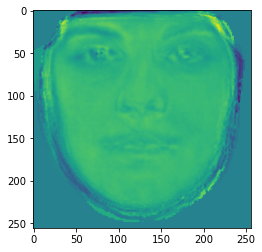

EIGENFACE:  7


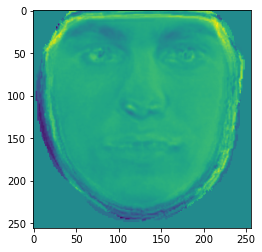

EIGENFACE:  8


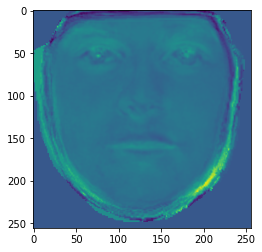

EIGENFACE:  9


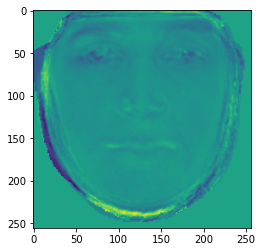

EIGENFACE:  10


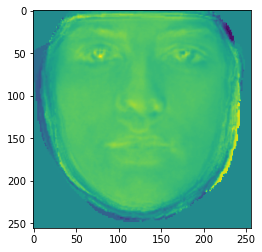

In [20]:
for i in range(10):
    print("EIGENFACE: ", i+1)
    test_image = eigenfaces.T[i]
    ex = (np.reshape(test_image, (256, 256)))
    pyplot.imshow(ex)
    pyplot.show()

### flatten test images

In [21]:
n_test = len(x_test)
d = x_test[0][0].shape[0]*x_test[0][1].shape[0]
x_test_ = np.reshape(x_test, (n_test,d))

### test-avg(X)

In [22]:
x_test_1 = x_test_.copy()
x_test_1 = x_test_1.astype('float')
x_test_mean = np.mean(x_test_1,axis = 0)
x_test_1 -= np.mean(x_test_1, axis = 0)
print(x_test_1.shape)

(36, 65536)


In [23]:
proj_eig_test = np.dot(x_test_1, eigenfaces)
proj_eig_test_1 = np.dot(proj_eig_test,eigenfaces.T)

In [24]:
proj_eig_test_2 = proj_eig_test_1+x_test_mean

# FIGURE 2: Display testing images and reconstructed test images

TESTING Image:  1


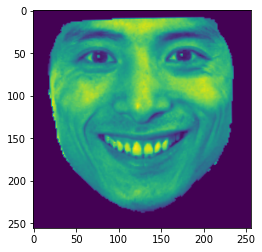

RECONSTRUCTED: 


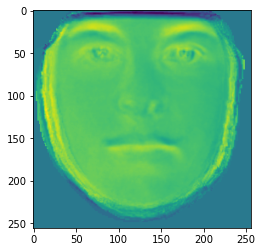

________________________________________________________________________________________________________________
TESTING Image:  2


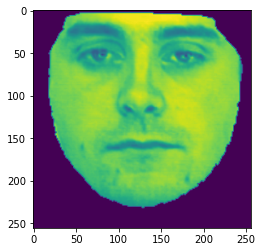

RECONSTRUCTED: 


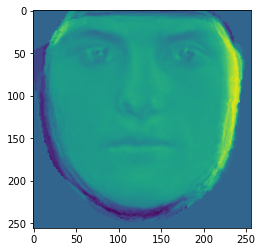

________________________________________________________________________________________________________________
TESTING Image:  3


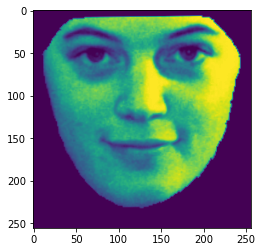

RECONSTRUCTED: 


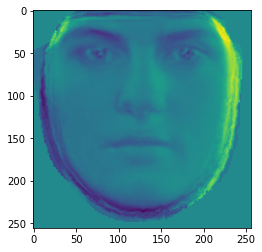

________________________________________________________________________________________________________________
TESTING Image:  4


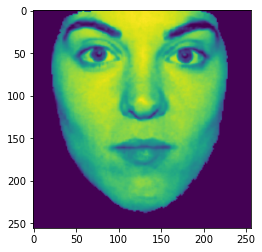

RECONSTRUCTED: 


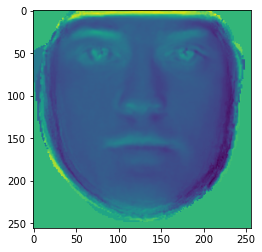

________________________________________________________________________________________________________________
TESTING Image:  5


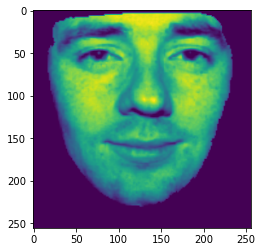

RECONSTRUCTED: 


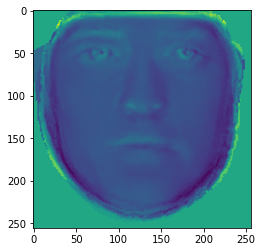

________________________________________________________________________________________________________________
Error:  1394.575271895198


In [25]:
for i in range(5):
    print("TESTING Image: ", i+1)
    test_image = x_test[i]
    pyplot.imshow(test_image)
    pyplot.show()
    print("RECONSTRUCTED: ")
    test_image_reconstructed = proj_eig_test_2[i]
    ex = (np.reshape(test_image_reconstructed, (256, 256)))
    pyplot.imshow(ex)
    pyplot.show()

    print("________________________________________________________________________________________________________________")
    
# er1 = sklearn.preprocessing.normalize(proj_eig_test_2,norm="l1")
# er2 = sklearn.preprocessing.normalize(x_test_,norm="l1")
er = proj_eig_test_2 - x_test_
error = np.sum(abs(er))/(n_test*256*256)
# error = (er1-er2)/(n_test*256*256)
print("Error: ", error)    

### Obtain error values for K = 10,30,50,100,150,300,500

In [34]:
K_values =[10,30,50,100,141]
error_list = []
for K in K_values:
    topKVects = eig_vects[:K]
    eigenfaces = np.dot(topKVects,x_train_)
    eigenfaces = eigenfaces.T
    eigenfaces = sklearn.preprocessing.normalize(eigenfaces,norm="l1")
    proj_eig_test = np.dot(x_test_1, eigenfaces)
    proj_eig_test_1 = np.dot(proj_eig_test,eigenfaces.T)
    proj_eig_test_2 = proj_eig_test_1+x_test_mean
    ##Calculate Error
    er = proj_eig_test_2 - x_test_
    error = np.sum(abs(er))/(n_test*256*256)
    error_list.append(error)
    print("K = ",K,": ", error)
    
#     if K == 10 or K == 141:
#         print("RECONSTRUCTED: ", K)
#         test_image_reconstructed = proj_eig_test_2[0]
#         ex = (np.reshape(test_image_reconstructed, (256, 256)))
#         pyplot.imshow(ex)
#         pyplot.show()

K =  10 :  4147.724950020915
K =  30 :  1394.575271895198
K =  50 :  801.9370777350344
K =  100 :  431.2672941104198
K =  141 :  292.1800459495903


## FIGURE 3: Plot showing error rate decreasing as k increases

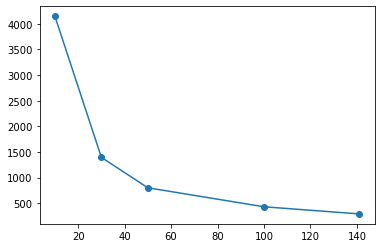

In [31]:
plt.plot(K_values, error_list,'-o')
plt.show()